# Homework 3 STA365 
Gabriel Mastromatteo

### Question 1

Create the Gibbs sampler such that it can be used for any arbitrary n,m and s. 

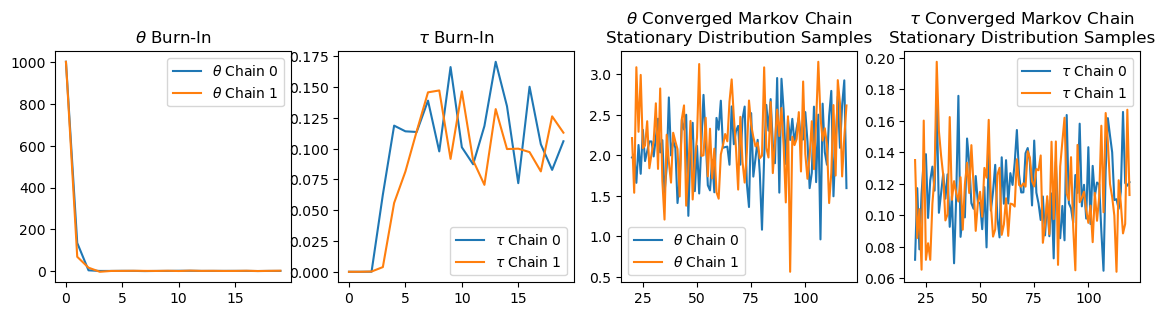

theta Credible interval [1.91400934 3.01947825]
tau Credible Interval [0.10281867 0.1701864 ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def gibbs_sampler(n, m, s, C=2, G=10000, burn=20, demo=120):
    # Generate random sample
    x = stats.norm(loc=m, scale=s).rvs(size=n)
    
    # Initialize Gibbs sampler chains
    theta, tau = np.zeros([C, G]), np.zeros([C, G])
    theta[:, 0] = 1000  # Initialization for theta
    
    # Gibbs sampling process
    for c in range(C):
        for g in range(1, G):
            tau[c, g] = stats.gamma(a=n/2 + 1, scale=2 / ((x - theta[c, g-1])**2).sum()).rvs()
            theta[c, g] = stats.norm(loc=x.mean(), scale=(1 / (tau[c, g] * n))**0.5).rvs()
    
    # Plotting results
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].set_title("$\\theta$ Burn-In")
    ax[1].set_title("$\\tau$ Burn-In")
    ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
    ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

    for c in range(C):
        ax[0].plot(theta[c, :burn], label=f"$\\theta$ Chain {c}")
        ax[1].plot(tau[c, :burn], label=f"$\\tau$ Chain {c}")
        ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=f"$\\theta$ Chain {c}")
        ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=f"$\\tau$ Chain {c}")

    for a in ax:
        a.legend()
    plt.show('png')
    
    return print('theta Credible interval '+ str(np.quantile(theta, [0.25, 0.975])) + '\n' +
                 'tau Credible Interval ' + str(np.quantile(tau, [0.25, 0.975])))

# Example usage with arbitrary n, m, and s
n = 50  # Sample size
m = 2   # Mean of the normal distribution
s = 3   # Standard deviation of the normal distribution

gibbs_sampler(n, m, s)

### Question 2 

### Full Conditional of  $\ p(\tau | \theta, x) \$:

#### Likelihood of the Data Given $ \theta\ $ and  $ \tau\$:
The likelihood is:

$$
p(x | \theta, \tau) \propto \prod_{i=1}^n \sqrt{\frac{\tau}{2 \pi}} \, e^{-\frac{\tau}{2} (x_i - \theta)^2}
$$

This simplifies to:

$$
p(x | \theta, \tau) = \left( \sqrt{\frac{\tau}{2 \pi}} \right)^n \, e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2}
$$

---

#### Form the Full Conditional:
The full conditional for \(\tau\) is proportional to the product of the likelihood and the prior:

$$
p(\tau | \theta, x) \propto p(x | \theta, \tau) \cdot p(\tau)
$$

The prior for $\tau\$ is:

$$
p(\tau) \propto \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau}
$$

Substituting the likelihood and prior into the full conditional:

$$
p(\tau | \theta, x) \propto \left( \sqrt{\frac{\tau}{2 \pi}} \right)^n \, e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2} \cdot \tau^{\frac{\alpha}{2} - 1} e^{-\frac{\lambda}{2} \tau}
$$

1. **Combine $\tau\$ dependent terms:**

   - $\tau^{n/2}$ comes from $\left( \sqrt{\frac{\tau}{2 \pi}} \right)^n$,
   - $\tau^{\frac{\alpha}{2} - 1}$ comes from the prior.

   Together:

   $$
   \tau^{n/2} \cdot \tau^{\frac{\alpha}{2} - 1} = \tau^{\frac{n}{2} + \frac{\alpha}{2} - 1}
   $$

2. **Combine the exponential terms:**

   - From the likelihood: $e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2}$,
   - From the prior: $e^{-\frac{\lambda}{2} \tau}$.

   Together:

   $$
   e^{-\frac{\tau}{2} \left( \sum_{i=1}^n (x_i - \theta)^2 + \lambda \right)}
   $$

Thus, the full conditional becomes:

$$
p(\tau | \theta, x) \propto \tau^{\frac{n}{2} + \frac{\alpha}{2} - 1} \, e^{-\frac{\tau}{2} \left( \sum_{i=1}^n (x_i - \theta)^2 + \lambda \right)}
$$

---

#### Recognize the Gamma Distribution:
The Gamma distribution has the form:

$$
\text{Gamma}(a, b) \propto x^{a-1} e^{-b x}
$$

From the full conditional, match the terms:

- The **shape parameter** is:

  $$
  a = \frac{n}{2} + \frac{\alpha}{2}
  $$

- The **rate parameter** is:

  $$
  b = \frac{\sum_{i=1}^n (x_i - \theta)^2 + \lambda}{2}
  $$

---

#### Final Form:
Thus, the full conditional is:

$$
p(\tau | \theta, x) \sim \text{Gamma}\left( \frac{n}{2} + \frac{\alpha}{2}, \frac{\sum_{i=1}^n (x_i - \theta)^2 + \lambda}{2} \right)
$$


### Full Conditional of $p(\theta | \tau, x)$

#### 1. Likelihood of $x$ Given $\theta$ and $\tau$:
The likelihood of $x$ given $\theta$ and $\tau$ is proportional to:

$$
p(x | \theta, \tau) \propto e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2}.
$$

Expand the quadratic term $\sum_{i=1}^n (x_i - \theta)^2$:

$$
\sum_{i=1}^n (x_i - \theta)^2 = n \theta^2 - 2 \theta \sum_{i=1}^n x_i + \sum_{i=1}^n x_i^2.
$$

Substituting this back into the likelihood:

$$
p(x | \theta, \tau) \propto e^{-\frac{\tau}{2} \left( n \theta^2 - 2 \theta \sum_{i=1}^n x_i \right)}.
$$

Simplify by defining the sample mean $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$:

$$
p(x | \theta, \tau) \propto e^{-\frac{\tau n}{2} \left( \theta^2 - 2 \theta \bar{x} \right)}.
$$

---

#### 2. Prior for $\theta$:
The prior for $\theta$ is given as:

$$
p(\theta) \propto e^{-\frac{\tau_0}{2} (\theta - \theta_0)^2}.
$$

Expand the quadratic term $(\theta - \theta_0)^2$:

$$
(\theta - \theta_0)^2 = \theta^2 - 2 \theta \theta_0 + \theta_0^2.
$$

Substituting this back:

$$
p(\theta) \propto e^{-\frac{\tau_0}{2} \left( \theta^2 - 2 \theta \theta_0 \right)}.
$$

---

#### 3. Combine the Likelihood and Prior:
The full conditional for $\theta$ is proportional to the product of the likelihood and the prior:

$$
p(\theta | \tau, x) \propto p(x | \theta, \tau) \cdot p(\theta).
$$

Substituting the likelihood and prior expressions:

$$
p(\theta | \tau, x) \propto e^{-\frac{\tau n}{2} \left( \theta^2 - 2 \theta \bar{x} \right)} \cdot e^{-\frac{\tau_0}{2} \left( \theta^2 - 2 \theta \theta_0 \right)}.
$$

Combine terms in the exponents:

$$
p(\theta | \tau, x) \propto e^{-\frac{1}{2} \left[ (\tau n + \tau_0) \theta^2 - 2 \theta (\tau n \bar{x} + \tau_0 \theta_0) \right]}.
$$

---

#### 4. Complete the Square:
Factor out $(\tau n + \tau_0)$ from the quadratic terms:

$$
p(\theta | \tau, x) \propto e^{-\frac{1}{2} (\tau n + \tau_0) \left[ \theta^2 - \frac{2 \theta (\tau n \bar{x} + \tau_0 \theta_0)}{\tau n + \tau_0} \right]}.
$$

Complete the square inside the brackets:

$$
\theta^2 - \frac{2 \theta (\tau n \bar{x} + \tau_0 \theta_0)}{\tau n + \tau_0} = \left( \theta - \frac{\tau n \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0} \right)^2 - \left( \frac{\tau n \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0} \right)^2.
$$

Substitute this back:

$$
p(\theta | \tau, x) \propto e^{-\frac{1}{2} (\tau n + \tau_0) \left( \theta - \hat{\theta} \right)^2},
$$

where:

$$
\hat{\theta} = \frac{\tau n \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0}.
$$

---

#### 5. Recognize the Normal Distribution:
From the above, the full conditional is the kernel of a normal distribution. The parameters are:

- **Mean**:

$$
\hat{\theta} = \frac{\tau n \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0}.
$$

- **Variance**:

$$
\sigma^2 = \frac{1}{\tau n + \tau_0}.
$$

---

#### 6. Final Expression:
The full conditional for $\theta$ is:

$$
p(\theta | \tau, x) \sim \text{Normal} \left( \hat{\theta}, \sigma^2 \right),
$$

where:

$$
\hat{\theta} = \frac{\tau n \bar{x} + \tau_0 \theta_0}{\tau n + \tau_0}, \quad \sigma^2 = \frac{1}{\tau n + \tau_0}.
$$


### Create Gibbs Sampler with new derivations

An updated version of the *Gibbs sampler* for $N(\theta_0, \tau^2_0)$ and $\textrm{gamma}(\textrm{shape}=\frac{\alpha}{2}, \textrm{rate}=\frac{\lambda}{2})$ priors for $p(\theta)$ and $p(\tau)$ respectively. With the credible intervals printed for each paramater for diffirent inputs of $\alpha$ and $\lambda$ to demonstrate how changing the prior hyperparameters influences the posterior relative to the sample and the likelihood.

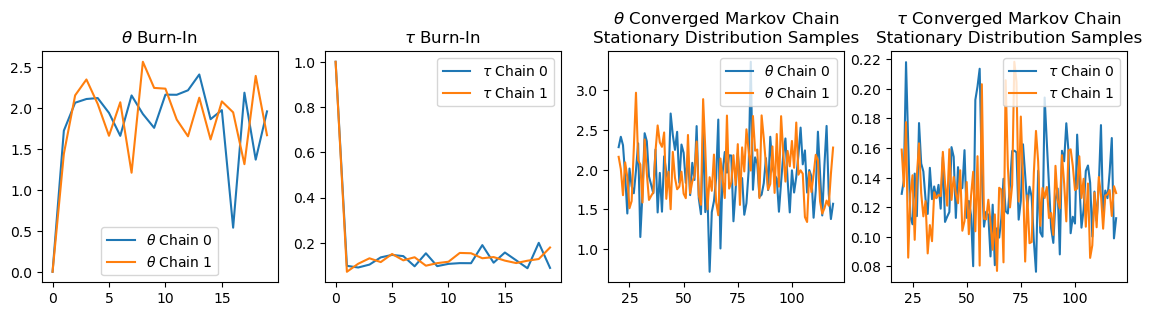

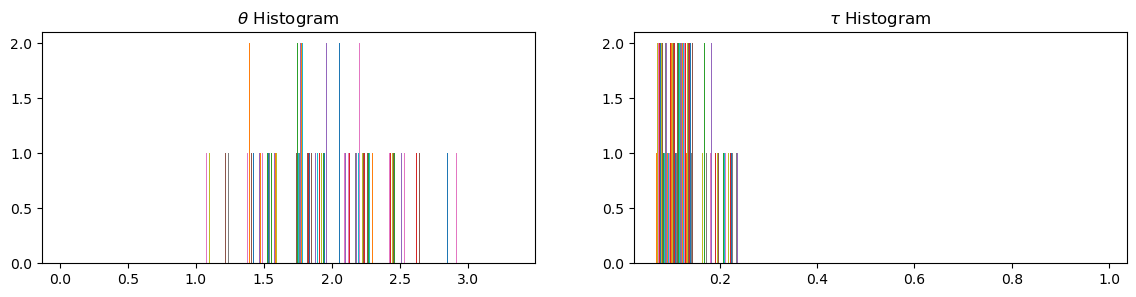

theta Credible interval: [1.71607082 2.68025506]
tau Credible Interval: [0.11169826 0.1871202 ]


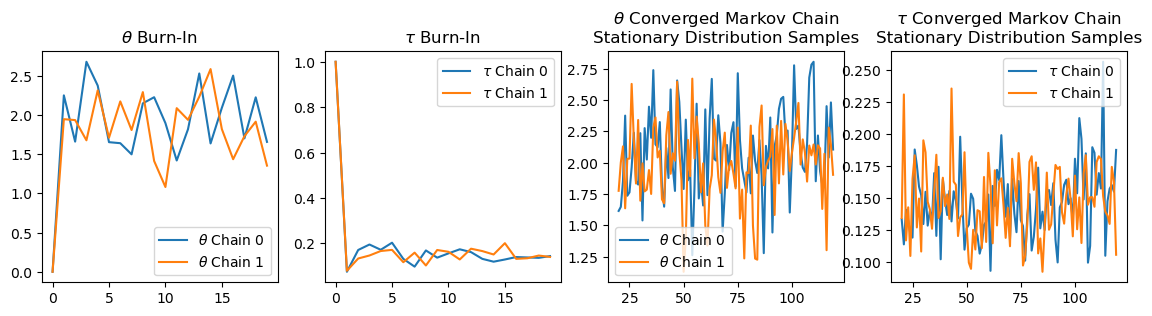

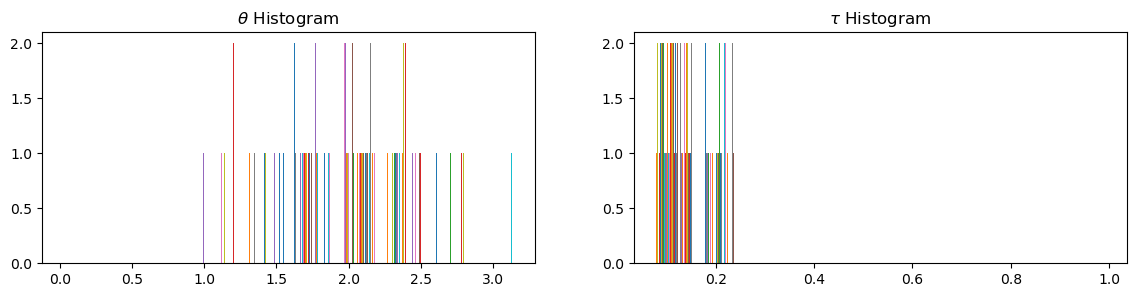

theta Credible interval: [1.76207933 2.67781941]
tau Credible Interval: [0.12987205 0.21245956]


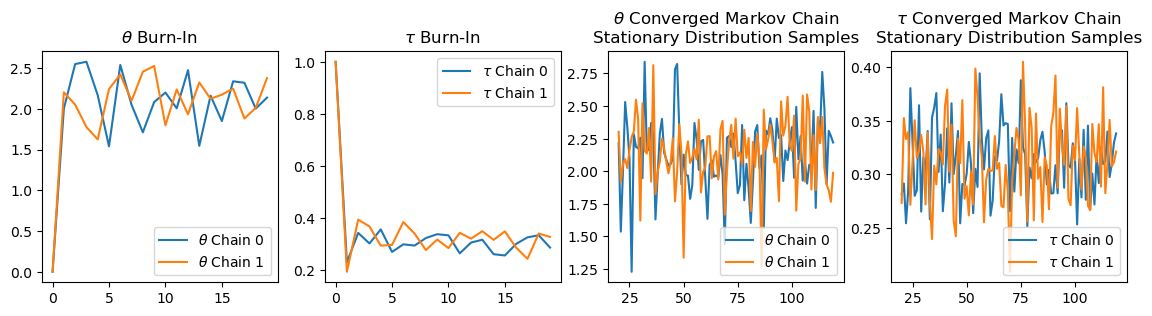

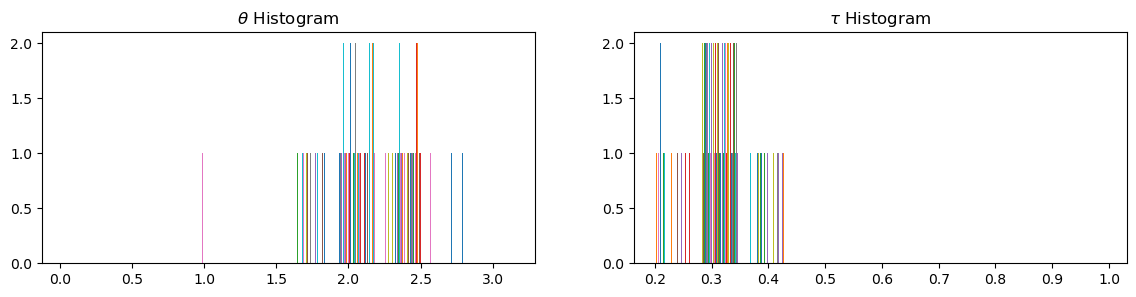

theta Credible interval: [1.97803212 2.60236706]
tau Credible Interval: [0.28722501 0.38314371]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
#x = norm(loc=m, scale=s).rvs(size=n)
def gibbs_sampler_updated(x, n, m, s, theta_0, tau_0, alpha, lambda_, C=2, G=1000, burn=20, demo=120):
    # Generate random sample
    
    # Initialize Gibbs sampler chains
    theta, tau = np.zeros([C, G]), np.zeros([C, G])
    theta[:, 0] = theta_0  # Initialization for theta
    tau[:, 0] = 1 / tau_0  # Initialization for tau (reciprocal variance)
    theta_CI = []
    tau_CI = []

    # Gibbs sampling process
    for c in range(C):
        for g in range(1, G):
            # Sample tau from its conditional distribution
            tau_shape = n / 2 + alpha / 2
            tau_scale = 2 / (np.sum((x - theta[c, g-1])**2) + lambda_)
            tau[c, g] = gamma(a=tau_shape, scale=tau_scale).rvs()
            
            # Sample theta from its conditional distribution
            theta_mean = (n * x.mean() * tau[c, g] + theta_0 * tau_0) / (n * tau[c, g] + tau_0)
            theta_var = 1 / (n * tau[c, g] + tau_0)
            theta[c, g] = norm(loc=theta_mean, scale=np.sqrt(theta_var)).rvs()
    
    # Plot results
    fig, ax = plt.subplots(1, 4, figsize=(14, 3))
    ax[0].set_title("$\\theta$ Burn-In")
    ax[1].set_title("$\\tau$ Burn-In")
    ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
    ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

    for c in range(C):
        ax[0].plot(theta[c, :burn], label=f"$\\theta$ Chain {c}")
        ax[1].plot(tau[c, :burn], label=f"$\\tau$ Chain {c}")
        ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label=f"$\\theta$ Chain {c}")
        ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label=f"$\\tau$ Chain {c}")

    for a in ax:
        a.legend()
        
    fig, ax = plt.subplots(1, 2, figsize=(14, 3))
    ax[0].set_title("$\\theta$ Histogram")
    ax[1].set_title("$\\tau$ Histogram")
    
    #for c in range(C):
    ax[0].hist(theta, density=False)
    ax[1].hist(tau, density=False)

    plt.show('png')
    
    #theta_CI.append(np.quantile(theta, [0.25, 0.975]))
    #tau_CI.append(np.quantile(tau, [0.25, 0.975]))
    return print('theta Credible interval: ' + str(np.quantile(theta, [0.25, 0.975])) + 
          '\n' + 'tau Credible Interval: ' + str(np.quantile(tau, [0.25, 0.975])))

# Example usage with arbitrary parameters
n = 50  # Sample size
m = 2   # Mean of the normal distribution
s = 3   # Standard deviation of the normal distribution
theta_0 = 0  # Prior mean for theta
tau_0 = 1    # Prior variance for theta
alpha = [1,10,100]    # Shape parameter for tau prior
lambda_ = [1,10,100]  # Rate parameter for tau prior
x = norm(loc=m, scale=s).rvs(size=n)

theta_CI = []
tau_CI = []
for i in range(3): 
    gibbs_sampler_updated(x, n, m, s, theta_0, tau_0, alpha[i], lambda_[i])
    
#print(theta_CI)

The hyperparameters $\alpha$ and $\lambda$ in the Gamma distribution control the influence of the prior relative to the likelihood in the posterior distribution. Specifically, $\alpha$, the shape parameter, determines the "strength" of the prior by effectively representing the number of "pseudo-data points" it contributes to the posterior. A larger $\alpha$ increases the weight of the prior, making the posterior less sensitive to the observed data, and in theory increasing the amount of "pseudo-data points" by placing a constructed reliance on a prior that is not observed. On the other hand, $\lambda$, the rate parameter, controls the spread or variability of the prior. A larger $\lambda$ shrinks the prior closer to zero, reflecting greater confidence in lower variance for the prior distribution. Together, $\alpha$ and $\lambda$ allow the prior to be interpreted as contributing a specific number of pseudo-data points that complement the actual data points in the likelihood. This balancing mechanism determines how much trust is placed in the prior versus the likelihood. For example, increasing $\alpha$ or decreasing $\lambda$ gives more weight to the prior, while a smaller $\alpha$ or larger $\lambda$ diminishes its influence, allowing the data to dominate the posterior. By tuning these parameters, you can effectively control the amount and nature of information the prior contributes, influencing the overall inference process. This is evident in the changing histograms, increasing variance (through wider intervals) as $\lambda$ increases and the relatively similar midpoints as $\alpha$ changes but quite different spreads, indicating the height is remaining the same but the shape chanhing. (I am sorry for the ugly histograms, I cannot use a big enough "G" parameter in my function to fill them in nicely without filling up my jupyter hub memory). 

### Question 3 

If the prior is a proper distribution, then by Bayes' Theorem, the posterior is proportional to the joint distribution:

$$
\
P(\theta | X) \propto P(X, \theta) = P(X | \theta) P(\theta)
\
$$ 

This means that, in principle, identifying the exact posterior distribution is simply a matter of recognizing the joint distribution and normalizing it appropriately. In some cases, one can determine the posterior’s functional form by comparing it to known families of distributions.

However, this entire discussion is somewhat moot from a practical Bayesian perspective. Rather than obsessing over the functional forms of the distributions, we take a more computational approach: generating samples from the posterior using Monte Carlo methods and otehr smapling methods such as Gibbs above or Bayesian Bandit from last week. From these samples, we construct histograms, estimate posterior means and variances, and make belief statements (credible intervals, probability assessments). Ultimately, what matters is not the closed-form derivation of the posterior but the ability to approximate its behavior through sampling and use it for inference.